# Running SOM on Txt: Topic Detection, Sentiment Analysis

In [3]:
import pandas as pd
import numpy as np

tweets_df = pd.read_json('Twitter_SCRAPING/profile_tweets.json', lines=True)
tweets_df.info()
# most columns contain the same number of non-null objects; 
# that umber equals the total number of entries - the number of deleted ones

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12545 entries, 0 to 12544
Data columns (total 36 columns):
contributors                 0 non-null float64
coordinates                  29 non-null object
created_at                   12389 non-null datetime64[ns]
delete                       156 non-null object
display_text_range           3875 non-null object
entities                     12389 non-null object
extended_entities            2316 non-null object
extended_tweet               1322 non-null object
favorite_count               12389 non-null float64
favorited                    12389 non-null float64
filter_level                 12389 non-null object
geo                          29 non-null object
id                           12389 non-null float64
id_str                       12389 non-null float64
in_reply_to_screen_name      2633 non-null object
in_reply_to_status_id        2209 non-null float64
in_reply_to_status_id_str    2209 non-null float64
in_reply_to_user_id        

In [4]:
tweets_df.head(2)

contributors coordinates          created_at delete display_text_range  \
0           NaN        None 2017-03-31 08:51:20    NaN                NaN   
1           NaN        None 2017-03-31 09:00:12    NaN                NaN   

                                            entities extended_entities  \
0  {'hashtags': [{'text': 'CAD', 'indices': [66, ...               NaN   
1  {'hashtags': [{'text': 'BIM', 'indices': [25, ...               NaN   

  extended_tweet  favorite_count  favorited  \
0            NaN             0.0        0.0   
1            NaN             0.0        0.0   

                         ...                         quoted_status_id_str  \
0                        ...                                          NaN   
1                        ...                                          NaN   

  reply_count  retweet_count  retweeted  \
0         NaN            0.0        0.0   
1         NaN            0.0        0.0   

                                    retweeted_status  \
0  {'created_at': 'Thu Mar 30 20:17:52 +0000 2017...   
1                                                NaN   

                                              source  \
0  <a href="http://twitter.com" rel="nofollow">Tw...   
1  <a href="http://www.hootsuite.com" rel="nofoll...   

                                                text            timestamp_ms  \
0  RT @Lynn_Allen: Check out this cool short vide... 2017-03-31 08:51:20.365   
1  Nuevo proyecto normativo #BIM ha comenzado en ... 2017-03-31 09:00:12.997   

   truncated                                               user  
0        0.0  {'id': 425197705, 'id_str': '425197705', 'name...  
1        0.0  {'id': 3240514762, 'id_str': '3240514762', 'na...  

[2 rows x 36 columns]

In [3]:
# compare some columns to deside which ones to keep
# compares the 'place' and 'geo' columns and writes True or NaN to a new column, 'geogeo'
tweets_df['geogeo'] = np.where(tweets_df['place'] == tweets_df['geo'], True, np.nan)

In [4]:
# remove comparison columns:
# tweets_df.drop(['geo'], axis=1, inplace=True)

In [5]:
# drop unnecessary columns
# contributors is empty; delete is not NaN only when the tweet actually does not exist; will remove these rows later; truncated infomation is of no interest
# retweet_count and retweeted; favorite_count and favorited; geo and coordinates, created_at and timestamp_ms contain the same information, not NaN when tweet text is not NaN
# entities contains data that is registered in other columns too (id, name etc.)
# str version of the same information contained in other columns (id_str, in_reply_to_status_id_str, in_reply_to_user_id_str, quoted_status_id_str)
tweets_df.drop(['geo', 'contributors', 'coordinates', 'created_at', 'delete', 'display_text_range', 'entities', 'extended_tweet', 'retweet_count', 'retweeted', 'favorite_count', 'favorited', 'truncated', 'id_str', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'quoted_status_id_str'],axis=1,inplace=True)               

In [6]:
tweets_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12545 entries, 0 to 12544
Data columns (total 19 columns):
extended_entities          2316 non-null object
filter_level               12389 non-null object
id                         12389 non-null float64
in_reply_to_screen_name    2633 non-null object
in_reply_to_status_id      2209 non-null float64
in_reply_to_user_id        2633 non-null float64
is_quote_status            12389 non-null float64
lang                       12389 non-null object
place                      209 non-null object
possibly_sensitive         6827 non-null float64
quote_count                2163 non-null float64
quoted_status              612 non-null object
quoted_status_id           612 non-null float64
reply_count                2163 non-null float64
retweeted_status           7330 non-null object
source                     12389 non-null object
text                       12389 non-null object
timestamp_ms               12389 non-null datetime64[ns]
user   

In [7]:
# drop empty tweet rows
print(len(tweets_df[tweets_df.text.isnull()]))
tweets_df[tweets_df.text.isnull()].head()

156


extended_entities filter_level  id in_reply_to_screen_name  \
193               NaN          NaN NaN                     NaN   
194               NaN          NaN NaN                     NaN   
251               NaN          NaN NaN                     NaN   
271               NaN          NaN NaN                     NaN   
351               NaN          NaN NaN                     NaN   

     in_reply_to_status_id  in_reply_to_user_id  is_quote_status lang place  \
193                    NaN                  NaN              NaN  NaN   NaN   
194                    NaN                  NaN              NaN  NaN   NaN   
251                    NaN                  NaN              NaN  NaN   NaN   
271                    NaN                  NaN              NaN  NaN   NaN   
351                    NaN                  NaN              NaN  NaN   NaN   

     possibly_sensitive  quote_count quoted_status  quoted_status_id  \
193                 NaN          NaN           NaN               NaN   
194                 NaN          NaN           NaN               NaN   
251                 NaN          NaN           NaN               NaN   
271                 NaN          NaN           NaN               NaN   
351                 NaN          NaN           NaN               NaN   

     reply_count retweeted_status source text timestamp_ms user  
193          NaN              NaN    NaN  NaN          NaT  NaN  
194          NaN              NaN    NaN  NaN          NaT  NaN  
251          NaN              NaN    NaN  NaN          NaT  NaN  
271          NaN              NaN    NaN  NaN          NaT  NaN  
351          NaN              NaN    NaN  NaN          NaT  NaN

In [8]:
tweets_df.dropna(how='all', inplace=True)
tweets_df.reset_index(drop=True,inplace=True)
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12389 entries, 0 to 12388
Data columns (total 19 columns):
extended_entities          2316 non-null object
filter_level               12389 non-null object
id                         12389 non-null float64
in_reply_to_screen_name    2633 non-null object
in_reply_to_status_id      2209 non-null float64
in_reply_to_user_id        2633 non-null float64
is_quote_status            12389 non-null float64
lang                       12389 non-null object
place                      209 non-null object
possibly_sensitive         6827 non-null float64
quote_count                2163 non-null float64
quoted_status              612 non-null object
quoted_status_id           612 non-null float64
reply_count                2163 non-null float64
retweeted_status           7330 non-null object
source                     12389 non-null object
text                       12389 non-null object
timestamp_ms               12389 non-null datetime64[ns]
user   

In [9]:
# text cleaning function:
'''
1. Souping / resolve problems with HTML encoding
2. BOM (Byte Order Mark) removing / in py2 solved by decoding to utf-8-sig; in py3 simply replace the characters 
3. negation handling (replace key with values from negation_dic)
4. lower-case
5. removing special characters
6. tokenizing and joining
'''
import re, string
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
#combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""

regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]

tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)

def tokenize(s):
    return tokens_re.findall(s)

def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], bom_removed).lower()
    words = [x for x  in preprocess(neg_handled) if len(x) > 1 and not x.startswith(':')]
    return (" ".join(words)).strip()

In [10]:
tweets_df['text'][193]

'RT @PlacesJournal: How does an architecture scholar critique Trump? @nytimes picks up Reinhold Martin @ColumbiaGSAPP @BuellCenter\n\nhttps://…'

In [ ]:
# clean the tweets, create a list of clean tweets
import warnings
# beautiful soup raises UserWarning; disable this
warnings.filterwarnings("ignore", category=UserWarning, module="__main__")
%time
print("Cleaning the tweets...\n")
clean_tweet_texts = []
for i in range(0,len(tweets_df)):
    if( (i+1)%1000 == 0 ):
        print("Tweets", i+1, "of ", len(tweets_df), "has been processed")                                                                   
    clean_tweet_texts.append(tweet_cleaner(tweets_df['text'][i]))

In [12]:
print(len(clean_tweet_texts), clean_tweet_texts[190:194])

12389 ['rt @shawnmicallef socialism for the rich the yellow belt https://t.co/huuzaa1m7v https://t.co/j2vjfsz4sf', 'rt @shawnmicallef socialism for the rich the yellow belt https://t.co/huuzaa1m7v https://t.co/j2vjfsz4sf', 'rt @algoritmic convolutional neural networks for artistic style transfer https://t.co/li7s6mcu0v via @copingbear #machinelearning https', 'rt @placesjournal how does an architecture scholar critique trump @nytimes picks up reinhold martin @columbiagsapp @buellcenter https']


In [13]:
# further text cleeaning: no mentions, no urls and no hashtags
pat1 = r'@[A-Za-z0-9_]+' # mention
pat2 = r'https?://[^ ]+' # url
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner_further(text):
    stripped = re.sub(combined_pat, '', text)
    stripped = re.sub(www_pat, '', stripped)
    letters_only = re.sub("[^a-zA-Z]", " ", stripped)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tokenize(letters_only) if len(x) > 1 and not x.startswith('#')]
    return (" ".join(words)).strip()

In [14]:
# clean the tweets, create a list of clean tweets
%time
print("Cleaning the tweets...\n")
cleaner_tweet_texts = []
for i in range(0,len(clean_tweet_texts)):
    if( (i+1)%1000 == 0 ):
        print("Tweets", i+1, "of ", len(clean_tweet_texts), "has been processed")                                                                   
    cleaner_tweet_texts.append(tweet_cleaner_further(clean_tweet_texts[i]))

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 13.1 µs
Cleaning the tweets...

Tweets 1000 of  12389 has been processed
Tweets 2000 of  12389 has been processed
Tweets 3000 of  12389 has been processed
Tweets 4000 of  12389 has been processed
Tweets 5000 of  12389 has been processed
Tweets 6000 of  12389 has been processed
Tweets 7000 of  12389 has been processed
Tweets 8000 of  12389 has been processed
Tweets 9000 of  12389 has been processed
Tweets 10000 of  12389 has been processed
Tweets 11000 of  12389 has been processed
Tweets 12000 of  12389 has been processed


In [15]:
print(len(cleaner_tweet_texts), cleaner_tweet_texts[180:184])

12389 ['want to create script file that deletes exactly the chars in that attribute field what is the command', 'uses bim team to speed up project delivery for the first time their client is part of the process', 'rt and bim explained in free minute video playlist bim globalbimcrew', 'coordinaci de proyectos internacionales con herramientas bim ignacio rez']


In [17]:
# create a new df from cleaned tweets and original columns
clean_df = pd.DataFrame(np.column_stack([clean_tweet_texts, cleaner_tweet_texts]), 
                               columns=['text1', 'text2'])

clean_df['timestamp'] = tweets_df.timestamp_ms
clean_df['location'] = tweets_df.place
clean_df['lang'] = tweets_df.lang
clean_df['extra'] = tweets_df.extended_entities
#clean_df.to_csv('clean_tweet.csv',encoding='utf-8')
print('clean_df', len(clean_df))
clean_df.head(2)

clean_df 12389


text1  \
0  rt @lynn_allen check out this cool short video...   
1  nuevo proyecto normativo #bim ha comenzado en ...   

                                               text2               timestamp  \
0  rt check out this cool short video on the hist... 2017-03-31 08:51:20.365   
1  nuevo proyecto normativo bim ha comenzado en e... 2017-03-31 09:00:12.997   

  location lang extra  
0     None   en   NaN  
1     None   es   NaN

In [18]:
# are there any empty text entries after cleaning?
null = (len(clean_df[clean_df.text2.isnull()]))
if null > 0:
    clean_df[clean_df.text2.isnull()].head()
else: 
    print(null, 'empty text entries')

0 empty text entries


In [19]:
# only english tweets
english_df = clean_df[clean_df.lang == 'en']
print('english_df', len(english_df))
english_df.head(2)

english_df 11266


text1  \
0  rt @lynn_allen check out this cool short video...   
2  rt @bimregscot #bimscotland network launch of ...   

                                               text2               timestamp  \
0  rt check out this cool short video on the hist... 2017-03-31 08:51:20.365   
2  rt bimscotland network launch of the bim tech ... 2017-03-31 09:02:02.468   

  location lang extra  
0     None   en   NaN  
2     None   en   NaN

## Zipf's Law

In [20]:
# Calculate terms frequencies

# count vectorizer to calculate the term frequencies; do not remove stopwords
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(english_df.text2)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [21]:
eng_doc_matrix = cvec.transform(english_df.text2)
eng_tf = np.sum(eng_doc_matrix,axis=0)
terms = np.squeeze(np.asarray(eng_tf))
term_freq_df = pd.DataFrame([terms],columns=cvec.get_feature_names()).transpose() #term_freq_df is with stopwords
term_freq_df.columns = ['terms']
#term_freq_df.head()
term_freq_df.sort_values(by='terms', ascending=False).iloc[:10]

terms
rt    6635
the   5605
to    4252
in    2826
of    2462
for   2002
and   1835
is    1824
you   1692
bim   1582

In [21]:
# write out term frequency to a file
term_freq_df.to_csv('Twitter_MINING/english_term-freq_df.csv',encoding='utf-8')

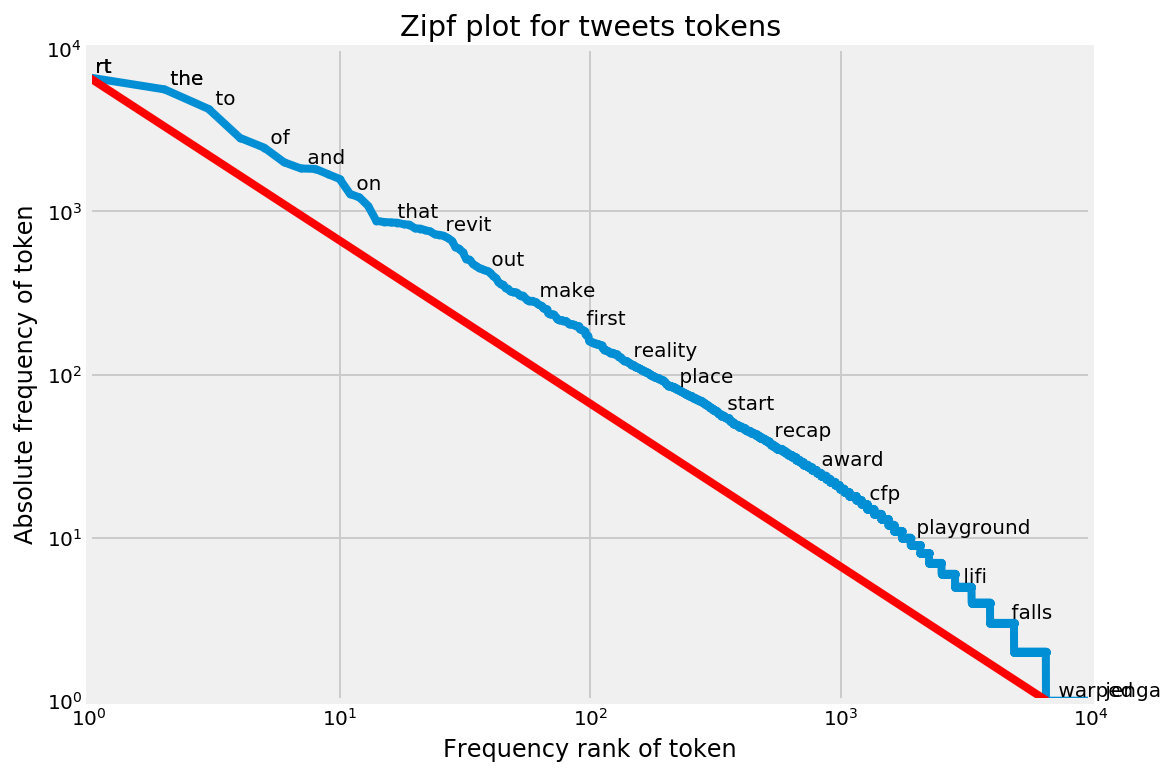

In [22]:
# Plot Zipf's law table

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from pylab import *
counts = term_freq_df.terms
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**4)
plt.xlim(1,10**4)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

In [22]:
# Calculate term frequencies without stop words

# First, add some Twitter specific words to the list of stopwords
from sklearn.feature_extraction import text
twitter_stop_words = ['rt', 'https', 'http', 'co']
stopwords = text.ENGLISH_STOP_WORDS.union(twitter_stop_words)

cvec = CountVectorizer(stop_words=stopwords,max_features=10000)
cvec.fit(english_df.text2)
document_matrix = cvec.transform(english_df.text2)

In [23]:
term_batches = np.linspace(0,11266,10).astype(int) # from 0 to 798179
i=0
eng_tf_stopped = []
while i < len(term_batches)-1:
    batch_result = np.sum(document_matrix[term_batches[i]:term_batches[i+1]].toarray(),axis=0)
    eng_tf_stopped.append(batch_result)
    print(term_batches[i+1],"entries' term freuquency calculated")
    i += 1

1251 entries' term freuquency calculated
2503 entries' term freuquency calculated
3755 entries' term freuquency calculated
5007 entries' term freuquency calculated
6258 entries' term freuquency calculated
7510 entries' term freuquency calculated
8762 entries' term freuquency calculated
10014 entries' term freuquency calculated
11266 entries' term freuquency calculated


In [24]:
terms_stopped = np.sum(eng_tf_stopped,axis=0)
term_freq_df_stopped = pd.DataFrame([terms_stopped],columns=cvec.get_feature_names()).transpose() # term_freq_df2 is without stopwords
term_freq_df_stopped.columns = ['terms']
term_freq_df_stopped.sort_values(by='terms', ascending=False).iloc[:10]

terms
bim            1582
construction    830
revit           719
new             663
design          562
autocad         451
building        391
help            336
world           320
architecture    309

## Word2Vec and TF-IDF models

### Word2Vec model

https://rare-technologies.com/word2vec-tutorial/

In [25]:
import gensim
# X is a list of tokenized texts (i.e. list of lists of tokens)
X = [word_tokenize(item) for item in english_df['text2'].tolist()]
#print(X[0:3])
model = gensim.models.Word2Vec(X, iter=5, min_count=6, size=100) # min_count: how many times a word appears in the corpus
#model.accuracy('a question')

In [26]:
# check the model
# one word matrix
model.wv['bim']

array([ 0.4955157 , -0.19619466,  0.5757234 , -0.11817187,  0.01532956,
        0.00867819,  0.07409302, -0.30407548,  0.43775904, -0.25972268,
       -0.02264136,  0.02965312,  0.40556508, -0.10888095,  0.17358267,
        0.3512296 , -0.08413705,  0.05954914, -0.5541467 ,  0.36365333,
       -0.05467412, -0.41546732, -0.23800944, -0.15963712, -0.05011716,
       -0.53663594, -1.0612153 ,  0.13036591,  0.32812977,  0.04165253,
       -0.28813   , -0.16795997,  0.10685756,  0.34780923, -0.81090903,
        0.2955973 ,  0.2980247 , -0.6425327 , -0.24704175,  0.07379568,
       -0.33358383, -0.50709724, -0.0336443 ,  0.17410251,  0.0928541 ,
        0.18113641,  0.18417373,  0.0204035 , -0.4945808 ,  0.1278042 ,
       -0.20861426, -0.2730727 ,  0.02576709,  0.05233095,  0.06031455,
       -0.3428922 , -0.3624821 , -0.13902837, -0.25436577,  0.47277692,
       -0.0583616 ,  0.30607158, -0.1967138 ,  0.12903224, -0.37309885,
       -0.6345884 ,  0.6647874 ,  0.4437462 , -0.45760888,  0.02

In [248]:
# find 10 words closest to "digital"
model.wv.most_similar(positive=["digital"], topn=12)

[('dprinting', 0.9996815323829651),
 ('uk', 0.9995423555374146),
 ('report', 0.9994752407073975),
 ('virtualreality', 0.9994520545005798),
 ('mediasummit', 0.9993979334831238),
 ('environment', 0.9993848204612732),
 ('performance', 0.9993574619293213),
 ('data', 0.9993513822555542),
 ('innovation', 0.9993277192115784),
 ('university', 0.9993016123771667),
 ('infrastructure', 0.9992389678955078),
 ('project', 0.9992353320121765)]

In [249]:
# find 10 words closest to "digital"
model.wv.most_similar(positive=["environment"], topn=12)

[('uk', 0.999633252620697),
 ('bridge', 0.9995460510253906),
 ('dprinting', 0.9995056986808777),
 ('history', 0.9995051622390747),
 ('report', 0.9994421601295471),
 ('story', 0.9994305372238159),
 ('performance', 0.9994088411331177),
 ('collaboration', 0.9993984699249268),
 ('innovation', 0.9993964433670044),
 ('digital', 0.9993847608566284),
 ('ground', 0.9993587136268616),
 ('incredible', 0.9993313550949097)]

In [27]:
# find the word most similar to the positive list and oposite of negative
model.wv.most_similar(positive=['architecture', 'digital'], negative=['hand'], topn=1)

[('in', 0.9921603798866272)]

In [28]:
# extract a word that does not match the list or that is the least similar to other words
model.wv.doesnt_match("architecture digital construction building".split())

'construction'

In [29]:
model.wv.similarity('digital','infrastructure')

0.9992269874671098

In [55]:
# write out the vector file
# for each word in the vocabulary, write out the word vectors
from io import StringIO
fvec = open("Twitter_MINING/english_df_vectors.txt", 'w')
for word in model.wv.vocab.keys():
    vec = model.wv[word]
    for i in range(vec.shape[0]):
        s = StringIO()
    np.savetxt(s, vec, fmt="%.5f", newline=",")
    #print(type(s))
    fvec.write("%s%s\n" % (s.getvalue(), word))
fvec.close()

In [56]:
# show the vectors
print(len(model.wv.vectors))

2857


In [228]:
print(np.array([model.wv[word]]).shape)
# use this value to match the shape of arr in the following function

(1, 100)


In [243]:
# USING TSNE TO DISPLAY SIMILAR WORDS IN THE WORD2VEC MODEL
# https://medium.com/@aneesha/using-tsne-to-plot-a-subset-of-similar-words-from-word2vec-bb8eeaea6229
from sklearn.manifold import TSNE

# display model funciton
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,100), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.wv.most_similar(positive=[word], topn=12)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

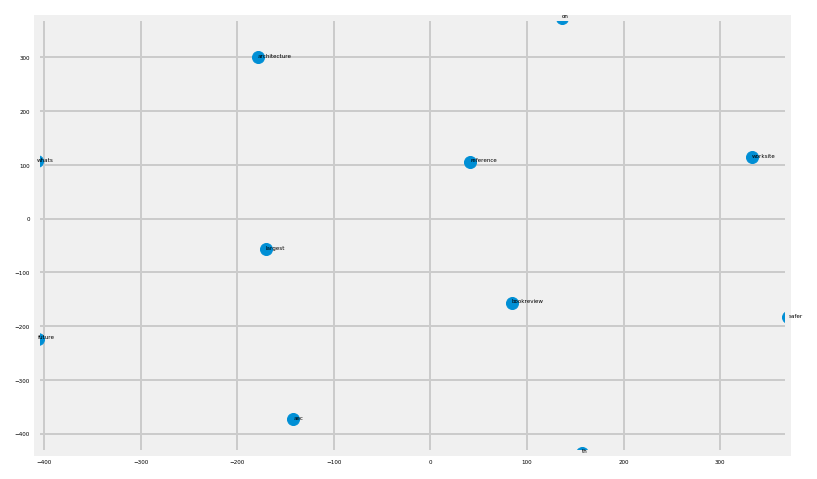

In [241]:
display_closestwords_tsnescatterplot(model, 'architecture')

### TF-IDF and document clustering

#### Topic Modeling with Scikit Learn
Anesha Bakharia, https://medium.com/mlreview/topic-modeling-with-scikit-learn-e80d33668730

In [232]:
# preprocess dataset
# remove stopwords
# create bag-of-words from the top 1000 words
# LDA and NWM analysis, limit emerging topics to 20 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

# improved display_topics function, returns both Top Words and Documents in a Topic
# https://towardsdatascience.com/improving-the-interpretation-of-topic-models-87fd2ee3847d
def display_topics(H, W, feature_names, docs, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print("Topic %d:" % (topic_idx))
        print("KEYWORDS", " ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        # good for checking which documents are the most characteristic for certain topics
        for doc_index in top_doc_indices:
            print("TOP DOCS", docs[doc_index])

In [233]:
# tweets dataset
tweets_list = english_df['text2'].tolist()

In [251]:
no_features = 1000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(tweets_list)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(tweets_list)
tf_feature_names = tf_vectorizer.get_feature_names()

no_topics = 15

# Run NMF
%time
nmf_model = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)
nmf_W = nmf_model.transform(tfidf)
nmf_H = nmf_model.components_

# Run LDA
%time
lda_model = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
lda_W = lda_model.transform(tf)
lda_H = lda_model.components_

no_top_words = 12
no_top_documents = 2

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs
CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 9.78 µs


In [235]:
display_topics(nmf_H, nmf_W, tfidf_feature_names, tweets_list, no_top_words, no_top_documents)

Topic 0:
KEYWORDS rt https math like people future day today looking look
TOP DOCS rt tgif listen to gsapp conversations podcast no hilary sample in conversation with dean amale andraos
TOP DOCS rt turei treatment highlights lie in our claim to be representative
Topic 1:
KEYWORDS bim using mean aec people model process explains minute read
TOP DOCS the bim dictionary will be progressively translated into at least languages in
TOP DOCS thanks pls cite bim thinkspace as bim thinkspace and bim framework as bim framework the bibliography
Topic 2:
KEYWORDS revit autodesk features dynamo webinar join pms functionality directly hear
TOP DOCS found my lost phone revit
TOP DOCS revit constrained rebar revit
Topic 3:
KEYWORDS autocad tbt fun fact included released tape cassette audio years
TOP DOCS fun fact released in autocad included an audio cassette tape autocad tbt
TOP DOCS rt fun fact released in autocad included an audio cassette tape autocad tbt
Topic 4:
KEYWORDS au class open vegas regi

In [252]:
display_topics(lda_H, lda_W, tf_feature_names, tweets_list, no_top_words, no_top_documents)

Topic 0:
KEYWORDS rt latest architect experts ale post don fusion talk week minutes tomorrow
TOP DOCS rt generativedesign as an architect the workspace aims to please everyone
TOP DOCS rt generativedesign as an architect the workspace aims to please everyone
Topic 1:
KEYWORDS rt best structural years tech ve concrete sf home easier support job
TOP DOCS difference between job and career is the clock tells you when to go home from your job
TOP DOCS rt feeling super proud that won the award best corporate workplace bcoawards officedesign
Topic 2:
KEYWORDS rt learn reality digital does did way model going engineering impressive mean
TOP DOCS rt going digital bentley advances reality modeling to extend the scope of engineering surveying value
TOP DOCS rt going digital bentley advances reality modeling to extend the scope of engineering surveying value
Topic 3:
KEYWORDS rt aec vr know build hi hear good live md let models
TOP DOCS sorry to hear you are having trouble what specifically is hap

#### From Complete Guide to TOPIC MODELING (LDA, scikit-learn)
https://nlpforhackers.io/topic-modeling/

In [ ]:
# data to work with: list of tweets
tweets_list = english_df['text2'].tolist()

In [255]:
# add some Twitter specific words to the list of stopwords
from sklearn.feature_extraction import text
twitter_stop_words = ['rt']
STOPWORDS = text.ENGLISH_STOP_WORDS.union(twitter_stop_words)

##### GENSIM LDA and LSI
(Complete guide, https://nlpforhackers.io/topic-modeling/)

In [262]:
NUM_TOPICS = 10

def clean_text(text):
    tokenized_text = word_tokenize(text.lower())
    cleaned_text = [t for t in tokenized_text if t not in STOPWORDS and re.match('[a-zA-Z\-][a-zA-Z\-]{2,}', t)]
    return cleaned_text
 
# Tokenize the data and filter out stopwords
CG_tokenized_data = []
for text in tweets_list:
    CG_tokenized_data.append(clean_text(text))

# Build a Dictionary - association word to numeric id
CG_dictionary = gensim.corpora.Dictionary(CG_tokenized_data)
 
# Transform the collection of texts to a numerical form
CG_corpus = [CG_dictionary.doc2bow(text) for text in CG_tokenized_data]
 
# Look at the e.g. 77th document: [(word_id, count), ...]
print(CG_corpus[77])

[(4, 1), (235, 1), (236, 1), (237, 1), (238, 1)]


In [293]:
import logging, bigfloat
bigfloat.exp(5000,bigfloat.precision(100))
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
np.seterr(all='ignore')  
# Build the LDA model
lda_model = gensim.models.LdaModel(corpus=CG_corpus, iterations=100, passes=2, num_topics=NUM_TOPICS, id2word=CG_dictionary, dtype=np.float64)

2018-06-03 18:54:35,012 : INFO : using symmetric alpha at 0.1
2018-06-03 18:54:35,014 : INFO : using symmetric eta at 0.1
2018-06-03 18:54:35,018 : INFO : using serial LDA version on this node
2018-06-03 18:54:35,034 : INFO : running online (multi-pass) LDA training, 10 topics, 2 passes over the supplied corpus of 11266 documents, updating model once every 2000 documents, evaluating perplexity every 11266 documents, iterating 100x with a convergence threshold of 0.001000
2018-06-03 18:54:35,036 : INFO : PROGRESS: pass 0, at document #2000/11266
2018-06-03 18:54:35,899 : INFO : merging changes from 2000 documents into a model of 11266 documents
2018-06-03 18:54:35,911 : INFO : topic #7 (0.100): 0.014*"new" + 0.011*"bim" + 0.011*"congratulations" + 0.011*"line" + 0.011*"order" + 0.010*"votes" + 0.010*"marchcadness" + 0.010*"champion" + 0.008*"revit" + 0.008*"parametric"
2018-06-03 18:54:35,912 : INFO : topic #0 (0.100): 0.041*"bim" + 0.010*"using" + 0.009*"great" + 0.008*"site" + 0.007*"

2018-06-03 18:54:39,270 : INFO : topic #9 (0.100): 0.017*"explorer" + 0.015*"bim" + 0.013*"help" + 0.012*"concrete" + 0.012*"construction" + 0.011*"photogrammetry" + 0.011*"recap" + 0.009*"offers" + 0.009*"new" + 0.009*"sci"
2018-06-03 18:54:39,277 : INFO : topic diff=0.490408, rho=0.408248
2018-06-03 18:54:39,283 : INFO : PROGRESS: pass 1, at document #2000/11266
2018-06-03 18:54:39,813 : INFO : merging changes from 2000 documents into a model of 11266 documents
2018-06-03 18:54:39,825 : INFO : topic #7 (0.100): 0.018*"new" + 0.011*"revit" + 0.010*"parametric" + 0.010*"live" + 0.009*"steel" + 0.009*"learn" + 0.008*"year" + 0.008*"architecture" + 0.008*"week" + 0.006*"https"
2018-06-03 18:54:39,827 : INFO : topic #0 (0.100): 0.053*"bim" + 0.013*"construction" + 0.013*"great" + 0.010*"vector" + 0.010*"architecture" + 0.009*"using" + 0.008*"revit" + 0.008*"istanbul" + 0.008*"meet" + 0.007*"cloud"
2018-06-03 18:54:39,828 : INFO : topic #3 (0.100): 0.011*"right" + 0.011*"best" + 0.010*"pho

2018-06-03 18:54:43,706 : INFO : topic #4 (0.100): 0.043*"field" + 0.022*"make" + 0.019*"software" + 0.018*"change" + 0.017*"play" + 0.015*"revit" + 0.012*"technology" + 0.012*"use" + 0.011*"work" + 0.010*"think"
2018-06-03 18:54:43,709 : INFO : topic diff=0.242032, rho=0.361953


In [294]:
# Build the LSI model
lsi_model = gensim.models.LsiModel(corpus=CG_corpus, num_topics=NUM_TOPICS, id2word=CG_dictionary)

2018-06-03 18:54:47,398 : INFO : using serial LSI version on this node
2018-06-03 18:54:47,400 : INFO : updating model with new documents
2018-06-03 18:54:47,403 : INFO : preparing a new chunk of documents
2018-06-03 18:54:47,496 : INFO : using 100 extra samples and 2 power iterations
2018-06-03 18:54:47,498 : INFO : 1st phase: constructing (10270, 110) action matrix
2018-06-03 18:54:47,643 : INFO : orthonormalizing (10270, 110) action matrix
2018-06-03 18:54:48,050 : INFO : 2nd phase: running dense svd on (110, 11266) matrix
2018-06-03 18:54:48,247 : INFO : computing the final decomposition
2018-06-03 18:54:48,250 : INFO : keeping 10 factors (discarding 67.070% of energy spectrum)
2018-06-03 18:54:48,259 : INFO : processed documents up to #11266
2018-06-03 18:54:48,260 : INFO : topic #0(47.793): -0.908*"bim" + -0.221*"construction" + -0.140*"revit" + -0.122*"new" + -0.084*"using" + -0.079*"building" + -0.068*"video" + -0.063*"design" + -0.054*"aec" + -0.050*"people"
2018-06-03 18:54:4

In [295]:
print("LDA Model:")
 
for idx in range(NUM_TOPICS):
    # Print the first 10 most representative topics
    print("Topic #%s:" % idx, lda_model.print_topic(idx, 10))
 
print("=" * 20)
 
print("LSI Model:")
 
for idx in range(NUM_TOPICS):
    # Print the first 10 most representative topics
    print("Topic #%s:" % idx, lsi_model.print_topic(idx, 10))
 
print("=" * 20)

LDA Model:
Topic #0: 0.056*"bim" + 0.019*"construction" + 0.016*"vector" + 0.013*"great" + 0.012*"revit" + 0.011*"architecture" + 0.009*"meet" + 0.008*"istanbul" + 0.008*"using" + 0.007*"mep"
Topic #1: 0.038*"autocad" + 0.015*"years" + 0.011*"environment" + 0.009*"line" + 0.008*"carlo" + 0.007*"ratti" + 0.007*"fun" + 0.007*"metro" + 0.007*"industry" + 0.006*"like"
Topic #2: 0.026*"bim" + 0.019*"construction" + 0.017*"building" + 0.013*"future" + 0.011*"using" + 0.010*"infrastructure" + 0.009*"place" + 0.009*"look" + 0.009*"like" + 0.008*"new"
Topic #3: 0.015*"photos" + 0.015*"best" + 0.013*"people" + 0.012*"cad" + 0.011*"drone" + 0.009*"right" + 0.009*"short" + 0.008*"created" + 0.007*"check" + 0.007*"designer"
Topic #4: 0.043*"field" + 0.022*"make" + 0.019*"software" + 0.018*"change" + 0.017*"play" + 0.015*"revit" + 0.012*"technology" + 0.012*"use" + 0.011*"work" + 0.010*"think"
Topic #5: 0.015*"tech" + 0.013*"making" + 0.013*"design" + 0.011*"house" + 0.011*"building" + 0.010*"new" +

In [314]:
# fit unseen text
y = "How architects talk about digital infrastructures in social media"
bow = dictionary.doc2bow(clean_text(y))
 
print(lsi_model[bow]) 
 
print(lda_model[bow])

TypeError: 'TruncatedSVD' object is not subscriptable

In [301]:
lda_index = gensim.similarities.MatrixSimilarity(lda_model[CG_corpus], num_features=500)
 
# Let's perform some queries
similarities = lda_index[lda_model[bow]]
# Sort the similarities
similarities = sorted(enumerate(similarities), key=lambda item: -item[1])
 
# Top most similar documents:
print(similarities[:10])
# [(104, 0.87591344), (178, 0.86124849), (31, 0.8604598), (77, 0.84932965), (85, 0.84843522), (135, 0.84421808), (215, 0.84184396), (353, 0.84038532), (254, 0.83498049), (13, 0.82832891)]
 
# Let's see what's the most similar document
document_id, similarity = similarities[0]
print(tweets_list[document_id][:1000])

2018-06-03 18:55:57,078 : INFO : creating matrix with 11266 documents and 500 features


[(995, 0.99786466), (5020, 0.9883472), (7722, 0.9688522), (10563, 0.96049595), (5048, 0.960297), (10465, 0.9514845), (6839, 0.9503768), (966, 0.9501924), (8911, 0.9378737), (10385, 0.9248829)]
interview with ceo qi su why he founded modelo now faster architects with vr


##### SCIKIT-LEARN LDA
(Complete Guide, https://nlpforhackers.io/topic-modeling/)

In [303]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
 
NUM_TOPICS = 10

CG_vectorizer = CountVectorizer(min_df=5, max_df=0.9, 
                             stop_words=STOPWORDS, lowercase=True, 
                             token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
tweets_vectorized = CG_vectorizer.fit_transform(tweets_list)

In [304]:
# Build a Latent Dirichlet Allocation Model
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online')
lda_Z = lda_model.fit_transform(tweets_vectorized)
print(lda_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)

(11266, 10)


In [305]:
# Build a Non-Negative Matrix Factorization Model
nmf_model = NMF(n_components=NUM_TOPICS)
nmf_Z = nmf_model.fit_transform(tweets_vectorized)
print(nmf_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)

(11266, 10)


In [306]:
# Build a Latent Semantic Indexing Model
lsi_model = TruncatedSVD(n_components=NUM_TOPICS)
lsi_Z = lsi_model.fit_transform(tweets_vectorized)
print(lsi_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)

(11266, 10)


In [307]:
# Let's see how the first document in the corpus looks like in different topic spaces
print(lda_Z[0])
print(nmf_Z[0])
print(lsi_Z[0])

[0.01111111 0.01111111 0.01111111 0.01111111 0.01111126 0.01111132
 0.01111111 0.01111111 0.89999964 0.01111111]
[0.00245236 0.00503506 0.0030684  0.02483788 0.         0.19561447
 0.00271422 0.00155324 0.         0.        ]
[ 0.1600967   0.19084417  0.04026211  0.25038126  0.28148239  0.74585954
  0.12273733  0.01216826 -0.55160623 -0.33251364]


In [308]:
def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])
 
print("LDA Model:")
print_topics(lda_model, CG_vectorizer)
print("=" * 20)
 
print("NMF Model:")
print_topics(nmf_model, CG_vectorizer)
print("=" * 20)
 
print("LSI Model:")
print_topics(lsi_model, CG_vectorizer)
print("=" * 20)

LDA Model:
Topic 0:
[('make', 265.3901384139425), ('use', 193.85872272829337), ('software', 145.87723074252284), ('day', 131.93198612238538), ('built', 113.50205515609724), ('year', 110.51162334849339), ('project', 100.80213227118612), ('information', 85.51998399550793), ('tool', 85.23614485334919), ('photo', 79.67110419865362)]
Topic 1:
[('great', 252.20203698584123), ('just', 188.05984706539402), ('today', 166.72595453050405), ('play', 140.7356514668908), ('looking', 107.69866916504887), ('things', 99.22475954361096), ('think', 99.17292156686686), ('sure', 95.5612804344393), ('read', 95.32058909639524), ('world', 90.82750997217926)]
Topic 2:
[('autocad', 441.4229402657647), ('construction', 321.8738534973876), ('new', 321.1202531573569), ('help', 308.2723634224731), ('revit', 230.41309640381712), ('time', 227.89242223734414), ('know', 200.88652394643526), ('watch', 190.67324795739628), ('thanks', 170.23581866824003), ('learn', 166.39577524464286)]
Topic 3:
[('like', 229.0371509063399

[('design', 0.6513224136011643), ('make', 0.2952636697580582), ('autodesk', 0.23852631312732647), ('world', 0.17089642810856798), ('use', 0.1335082576800082), ('just', 0.13347986251789878), ('software', 0.129638829793714), ('passivhaus', 0.11004090917137013), ('architecture', 0.10717533314827357), ('reality', 0.1011012524798498)]
Topic 6:
[('new', 0.7870590323799889), ('design', 0.16589966942435408), ('just', 0.057290815397824234), ('watch', 0.05666198908369982), ('edinburgh', 0.05451144016829347), ('york', 0.0535083403938582), ('delivered', 0.051971964621152694), ('high', 0.03817706160971816), ('art', 0.03586344731207418), ('facility', 0.03461812436414066)]
Topic 7:
[('field', 0.7878668825386909), ('play', 0.3620146578740182), ('explorer', 0.340841548924883), ('vector', 0.3390764982207472), ('new', 0.03571894913935442), ('look', 0.034287165385775684), ('half', 0.02949513409427161), ('stem', 0.029229317402103088), ('graduates', 0.028483518590571903), ('computerscience', 0.0284211717574

In [311]:
# fit unseen document
text = "How architects talk about digital infrastructures in social media"
x = nmf_model.transform(CG_vectorizer.transform([text]))[0]
print(x)

[0.00348652 0.00021821 0.         0.00503636 0.00042245 0.01325116
 0.00473372 0.         0.00472112 0.00035066]


In [313]:
# similarity
from sklearn.metrics.pairwise import euclidean_distances
 
def most_similar(x, Z, top_n=5):
    dists = euclidean_distances(x.reshape(1, -1), Z)
    pairs = enumerate(dists[0])
    most_similar = sorted(pairs, key=lambda item: item[1])[:top_n]
    return most_similar
 
similarities = most_similar(x, nmf_Z)
document_id, similarity = similarities[0]
print(tweets_list[document_id][:1000])

better way to code introducing the integrated discovery environment


##### PLOT RESULTS

In [315]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet
output_notebook()

Loading BokehJS ...

In [317]:
# plotting documents in 2D
svd = TruncatedSVD(n_components=2)
documents_2d = svd.fit_transform(tweets_vectorized)
 
CG_df = pd.DataFrame(columns=['x', 'y', 'document'])
CG_df['x'], CG_df['y'], CG_df['document'] = documents_2d[:,0], documents_2d[:,1], range(len(tweets_list))
 
source = ColumnDataSource(ColumnDataSource.from_df(CG_df))
labels = LabelSet(x="x", y="y", text="document", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
 
plot = figure(plot_width=600, plot_height=600)
plot.circle("x", "y", size=12, source=source, line_color="black", fill_alpha=0.8)
plot.add_layout(labels)
show(plot, notebook_handle=True)

In [318]:
# plotting words in 2D
svd = TruncatedSVD(n_components=2)
words_2d = svd.fit_transform(tweets_vectorized.T)
 
CG_df1 = pd.DataFrame(columns=['x', 'y', 'word'])
CG_df1['x'], CG_df1['y'], CG_df1['word'] = words_2d[:,0], words_2d[:,1], CG_vectorizer.get_feature_names()
 
source = ColumnDataSource(ColumnDataSource.from_df(CG_df1))
labels = LabelSet(x="x", y="y", text="word", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
 
plot = figure(plot_width=600, plot_height=600)
plot.circle("x", "y", size=12, source=source, line_color="black", fill_alpha=0.8)
plot.add_layout(labels)
show(plot, notebook_handle=True)

In [320]:
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, tweets_vectorized, CG_vectorizer, mds='tsne')
panel

/Users/zoza/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
2      13.185309        1       1 -345.647339 -147.719727
6      12.247065        1       2  127.909851  -35.610760
8      10.540740        1       3   10.499728  185.272614
4       9.510093        1       4 -122.460274  -27.146534
5       9.492835        1       5 -103.494804  415.144928
7       9.261788        1       6  367.308563   68.988182
1       9.251479        1       7  227.801468  329.875183
3       9.210994        1       8 -301.821259  181.360458
0       9.104359        1       9  -47.050636 -292.416992
9       8.195338        1      10  258.631592 -255.963425, topic_info=     Category         Freq             Term        Total  loglift  logprob
term                                                                      
261   Default  1441.000000              bim  1441.000000  30.0000  30.0000
2247  Default   691.000000            revit   691.000000  29.0000  29.0000
562   Default   838.000000     construction   838.000000  28.0000  28.0000
179   Default   419.000000          autocad   419.000000  27.0000  27.0000
713   Default   537.000000           design   537.000000  26.0000  26.0000
133   Default   287.000000     architecture   287.000000  25.0000  25.0000
1928  Default   266.000000           people   266.000000  24.0000  24.0000
1612  Default   260.000000             make   260.000000  23.0000  23.0000
1787  Default   607.000000              new   607.000000  22.0000  22.0000
180   Default   275.000000         autodesk   275.000000  21.0000  21.0000
1032  Default   251.000000            field   251.000000  20.0000  20.0000
1193  Default   247.000000            great   247.000000  19.0000  19.0000
2843  Default   252.000000            video   252.000000  18.0000  18.0000
1255  Default   310.000000             help   310.000000  17.0000  17.0000
2966  Default   297.000000            world   297.000000  16.0000  16.0000
1547  Default   215.000000             like   215.000000  15.0000  15.0000
334   Default   375.000000         building   375.000000  14.0000  14.0000
1457  Default   269.000000             just   269.000000  13.0000  13.0000
2814  Default   190.000000              use   190.000000  12.0000  12.0000
2697  Default   216.000000             time   216.000000  11.0000  11.0000
1574  Default   182.000000             look   182.000000  10.0000  10.0000
1115  Default   179.000000           future   179.000000   9.0000   9.0000
2954  Default   203.000000             work   203.000000   8.0000   8.0000
46    Default   203.000000              aec   203.000000   7.0000   7.0000
1304  Default   168.000000            https   168.000000   6.0000   6.0000
1774  Default   176.000000             need   176.000000   5.0000   5.0000
1911  Default   194.000000       passivhaus   194.000000   4.0000   4.0000
657   Default   174.000000             data   174.000000   3.0000   3.0000
2706  Default   164.000000            today   164.000000   2.0000   2.0000
1473  Default   191.000000             know   191.000000   1.0000   1.0000
...       ...          ...              ...          ...      ...      ...
449   Topic10    89.067973             city    89.934862   2.4919  -4.1260
1601  Topic10    86.572225  machinelearning    87.439233   2.4916  -4.1544
2065  Topic10    72.363829          product    73.230754   2.4897  -4.3336
2531  Topic10    68.257834            steel    69.124707   2.4890  -4.3921
1894  Topic10    61.566608       parametric    62.433460   2.4876  -4.4952
2835  Topic10    61.474761            vegas    62.341622   2.4876  -4.4967
1434  Topic10    59.514561            issue    60.381463   2.4871  -4.5291
383   Topic10    57.841595            carlo    58.708440   2.4867  -4.5576
1492  Topic10    49.420769              las    50.287609   2.4842  -4.7150
2136  Topic10    49.147348            ratti    50.014186   2.4841  -4.7205
868   Topic10    45.816818         e

#### Document Clustering with Python
bandomr, http://brandonrose.org/clustering

In [135]:
import nltk # already used more specifically
import os
import codecs
from sklearn import feature_extraction # same
import mpld3
from sklearn.feature_extraction.text import TfidfVectorizer

In [137]:
# prepare text for vectorizer as a list of strings
tweetslist = english_df['text2'].tolist()
print(len(textstring), textstring[0])

11266 rt check out this cool short video on the history of cad from blueprints to the design horizon


In [138]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [139]:
#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time 
tfidf_matrix = tfidf_vectorizer.fit_transform(tweetslist) #fit the vectorizer to tweets

print(tfidf_matrix.shape)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 11 µs
(11266, 1)


In [140]:
terms = tfidf_vectorizer.get_feature_names()

In [141]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

#### K-means clustering

In [142]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time 
km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 269 ms, sys: 3.59 ms, total: 273 ms
Wall time: 280 ms


In [143]:
from sklearn.externals import joblib

#joblib.dump(km,  'doc_cluster.pkl')
km = joblib.load('MAB/document_cluster/doc_cluster.pkl')
clusters = km.labels_.tolist()

/Users/zoza/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator KMeans from version pre-0.18 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/zoza/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The file 'MAB/document_cluster/doc_cluster.pkl' has been generated with a joblib version less than 0.10. Please regenerate this pickle file.
  after removing the cwd from sys.path.


In [ ]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    for ind in order_centroids[i, :6]:
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print()
    print()
    print("Cluster %d titles:" % i, end='')
    for title in frame.ix[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print()
    print()

## SOM IMPLEMENTATIONS

### MINISOM implementation
https://github.com/JustGlowing/minisom

In [74]:
from minisom import MiniSom    
map_dim = 10
som = MiniSom(map_dim, map_dim, 100, sigma=1.0, random_seed=1)
#som.random_weights_init(W)
som.train_batch(model.wv.vectors, 100)

In [51]:
qnt = som.quantization(model.wv.vectors)
print(len(qnt))

2857


[]

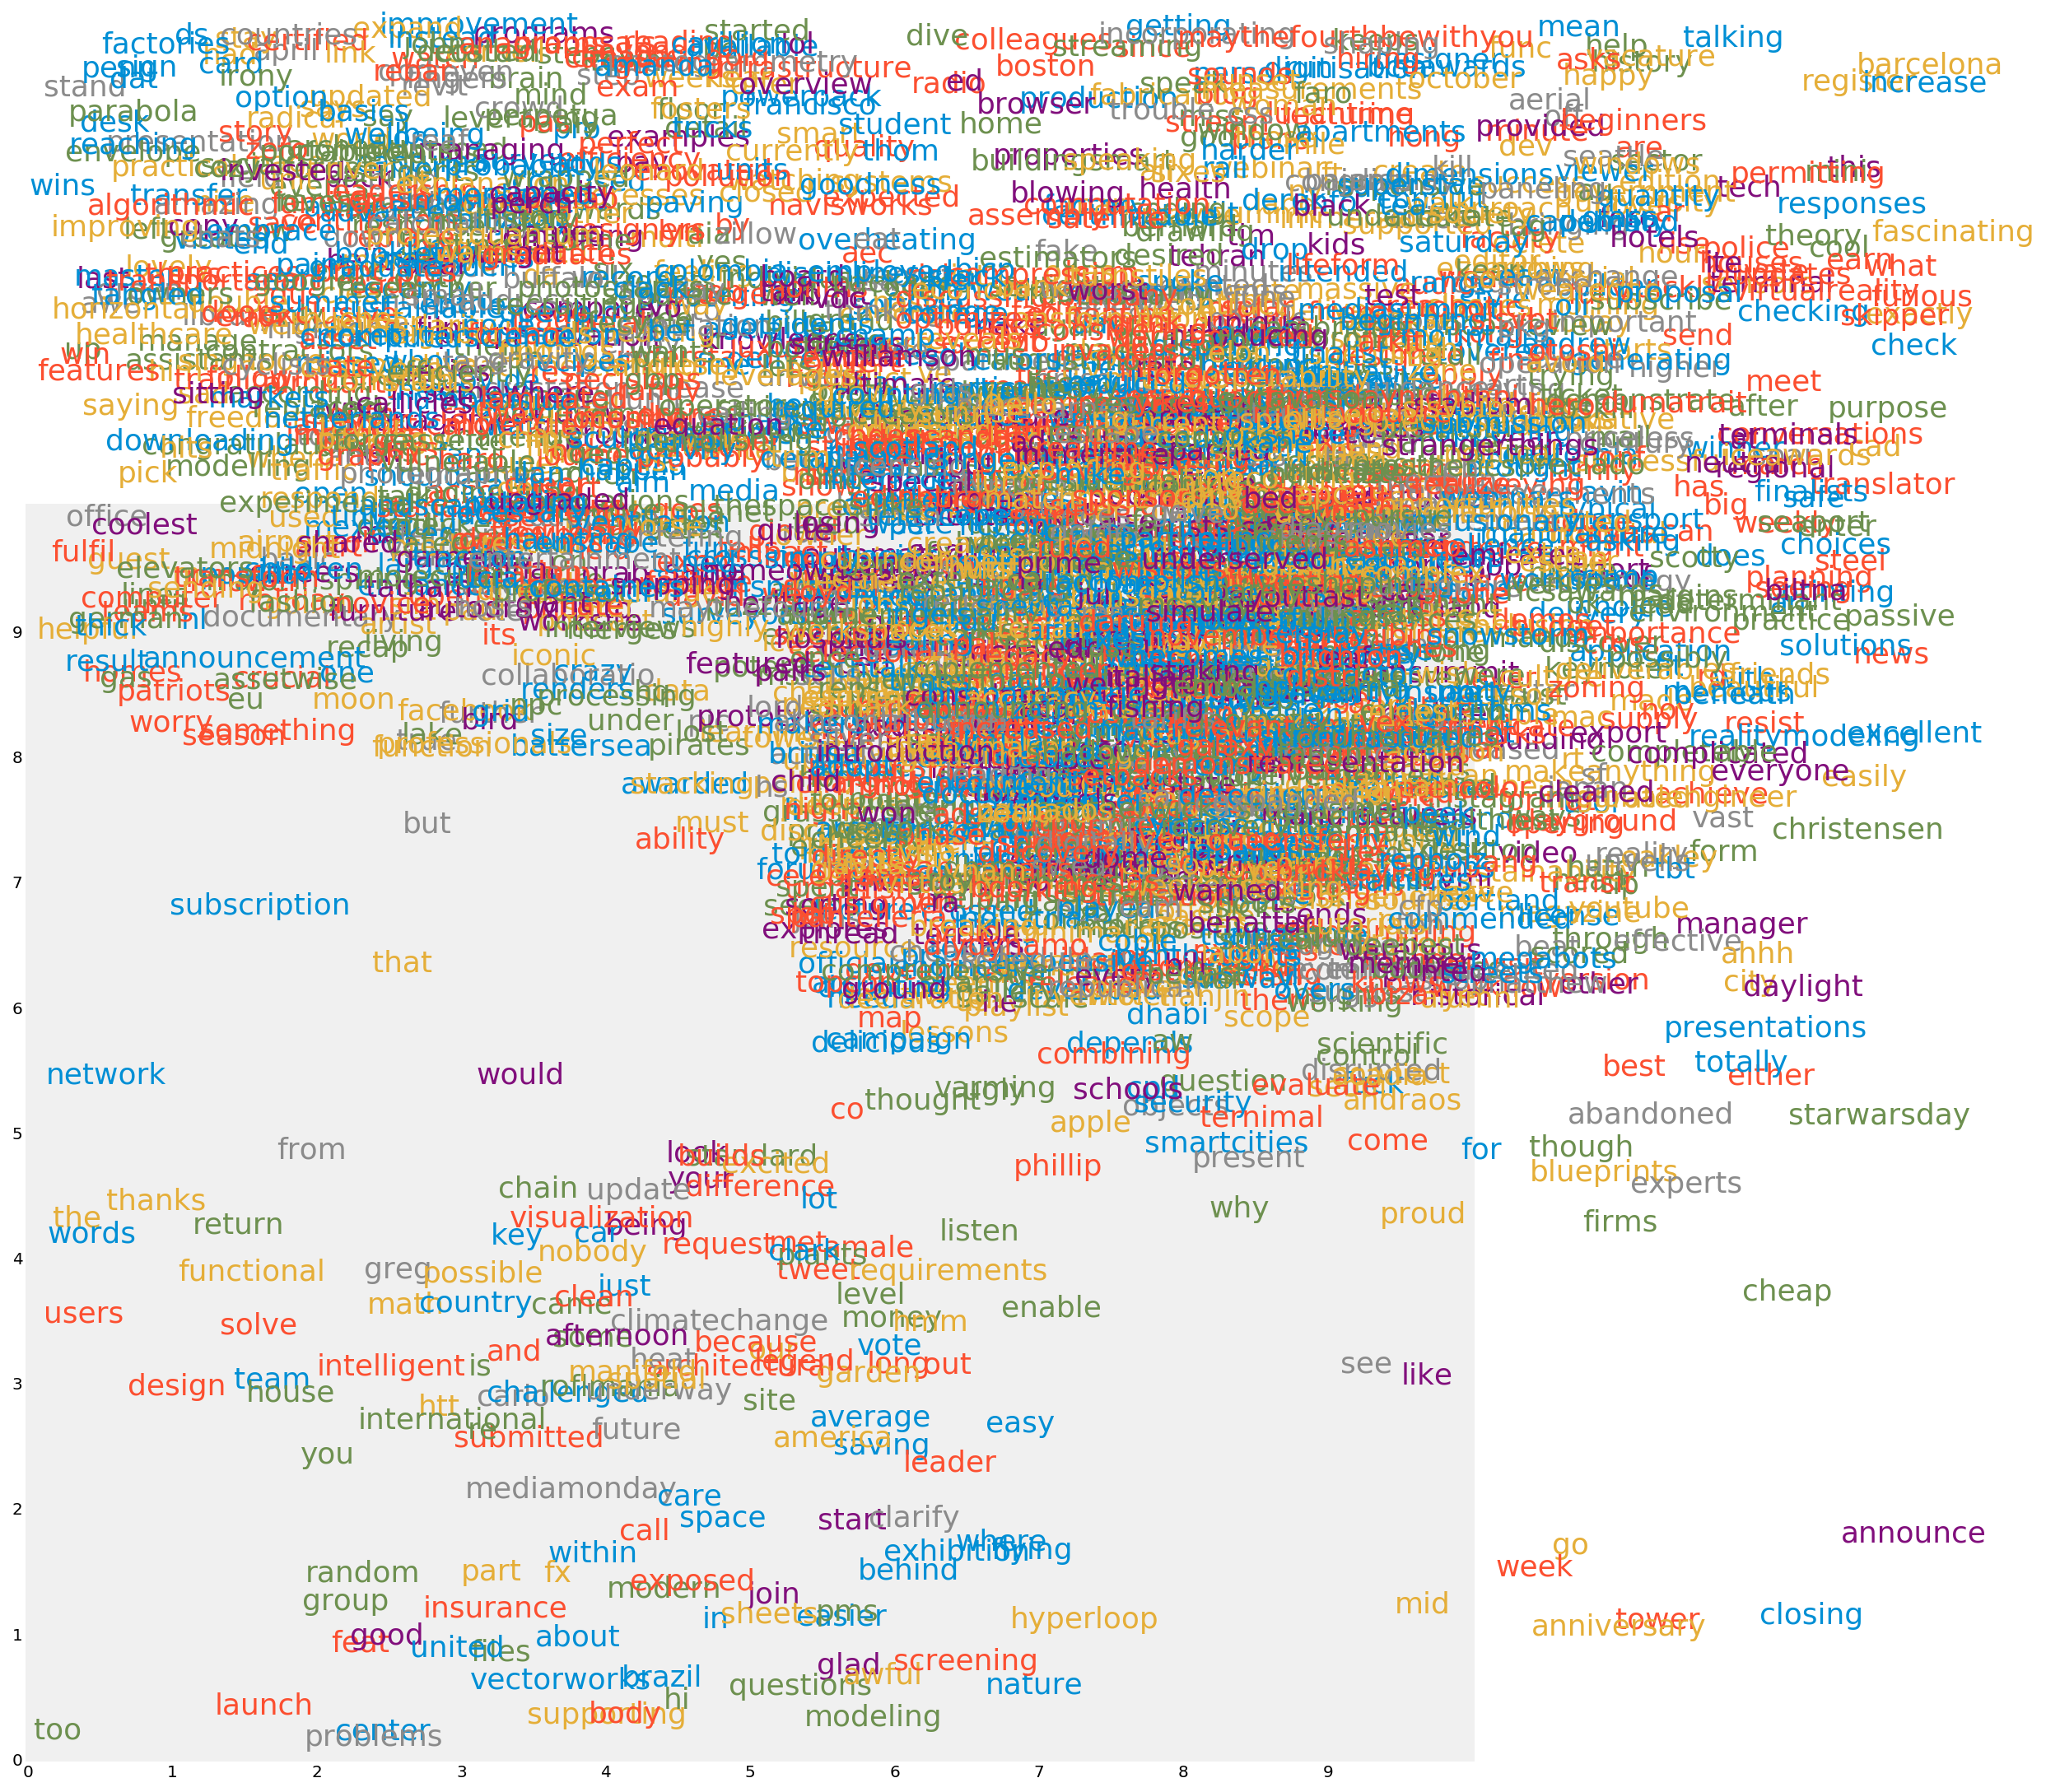

In [75]:
import random
plt.figure(figsize=(14, 14))
colors=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
for vec, t in zip(model.wv.vectors, model.wv.vocab.keys()):
    winnin_position = som.winner(vec)
    plt.text(winnin_position[0]+np.random.rand()*3.8, 
             winnin_position[1]+np.random.rand()*4.8, t, fontsize=18, color=random.choice(colors))

plt.xticks(range(map_dim))
plt.yticks(range(map_dim))
plt.grid()
plt.xlim([0, map_dim])
plt.ylim([0, map_dim])
plt.plot()

### SOMPY implementation 

https://github.com/sevamoo/data_driven_modeling_2018/blob/master/04_Clustering_Kmeans_SOM_20180327.ipynb

In [94]:
import sompylib3.sompy as SOM
msz11 =53
msz10 = 53
X = model.wv.vectors
som1 = SOM.SOM('', X, mapsize = [msz10, msz11],norm_method = 'var',initmethod='pca')
som1.init_map()
som1.train(n_job = 1, shared_memory = 'no',verbose='final')


Total time elapsed: 51.332000 secodns
final quantization error: 1.052216


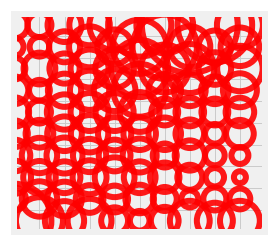

In [91]:
som1.hit_map()

In [93]:
#som1.compname = list(model.wv.vocab.keys())
print(len(list(model.wv.vocab.keys())))
#som1.view_map()

2857


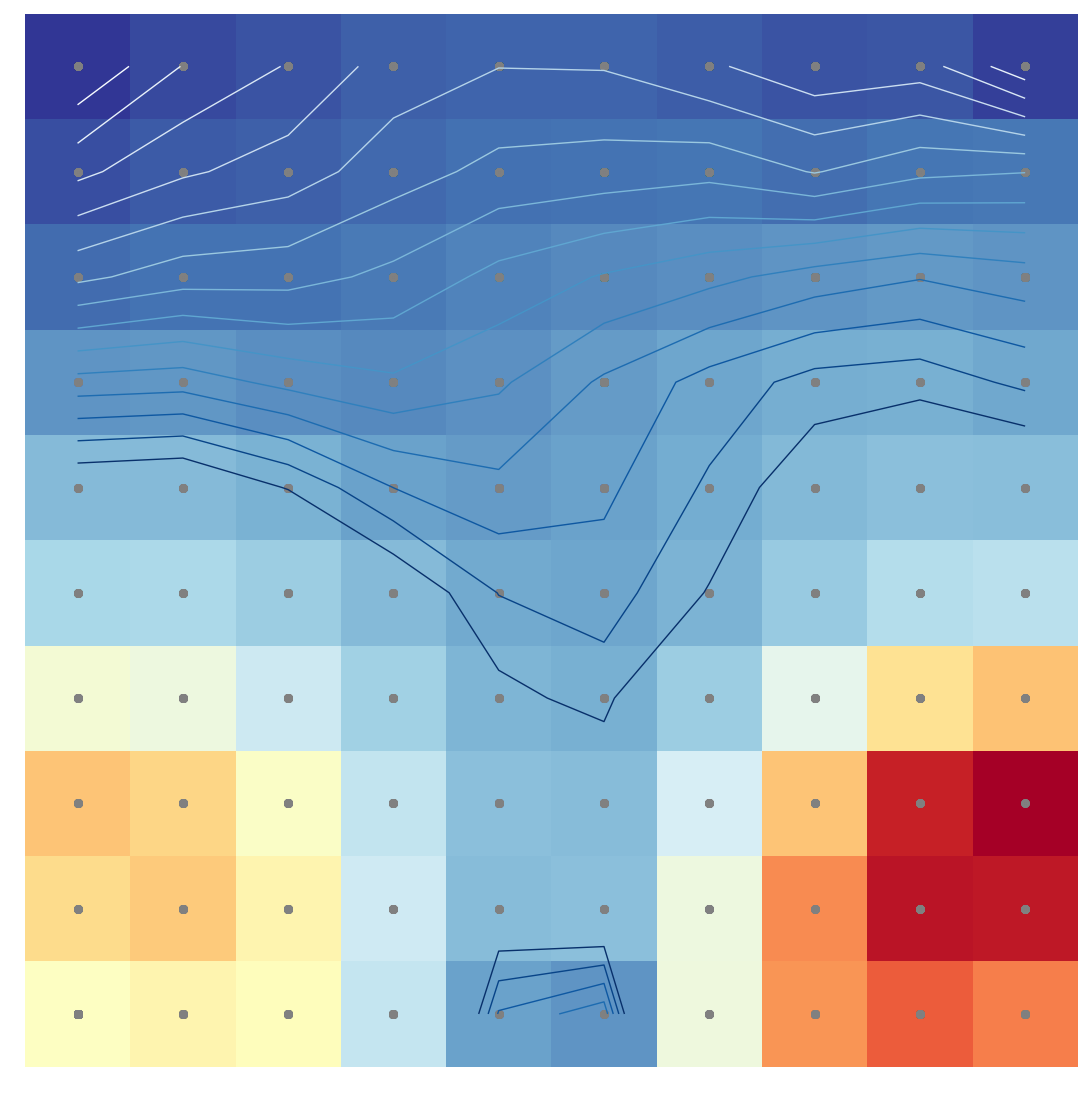

In [79]:
U = som1.view_U_matrix(distance2=2, row_normalized='No', show_data='Yes', contooor='Yes', blob='No', save='NO', save_dir='')

In [85]:
import somoclu

IndexError: list index out of range

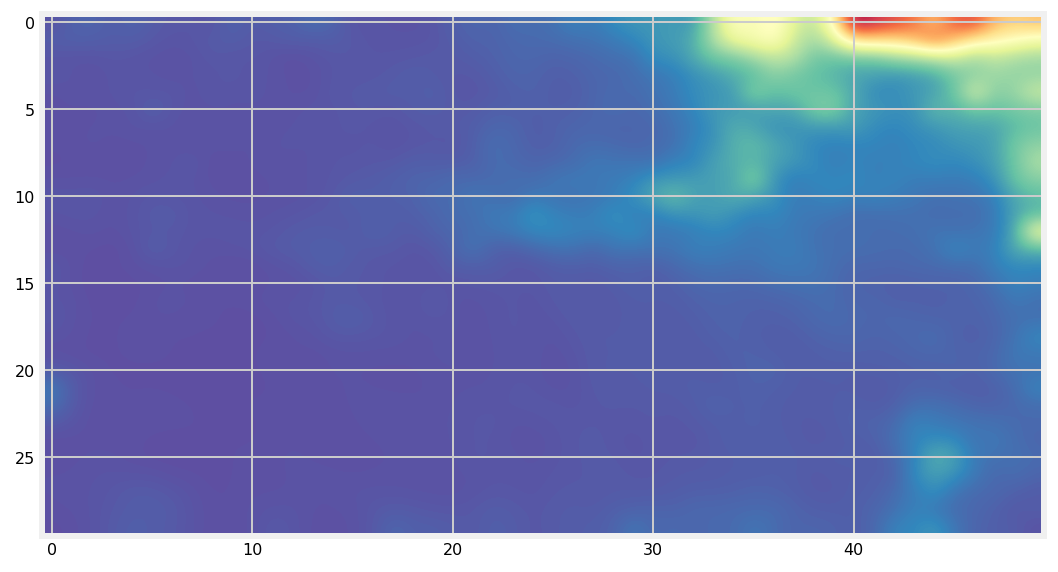

In [87]:
c1 = np.random.rand(50, 2)/5
c2 = (0.2, 0.5) + np.random.rand(50, 2)/5
c3 = (0.4, 0.1) + np.random.rand(50, 2)/5
data = model.wv.vectors
colors = ["red"] * 50
colors.extend(["green"] * 50)
colors.extend(["blue"] * 50)

labels = list(range(150))
#labels[2] = None
#labels[41] = None
#labels[40] = None
n_rows, n_columns = 30, 50
som = somoclu.Somoclu(n_columns, n_rows, data=data, maptype="planar",
                      gridtype="rectangular")
som.train(epochs=10)
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)
